## 分类DEMO

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
sns.set(style="white")
colors = sns.color_palette("husl")

### 导入数据集

In [2]:
X_test = np.load('./x_test.npy')
X_train = np.load('./x_train.npy')
y_test = np.load('./y_test.npy')
y_train = np.load('./y_train.npy')
X_train.shape

(7352, 561)

/Users/lianke/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

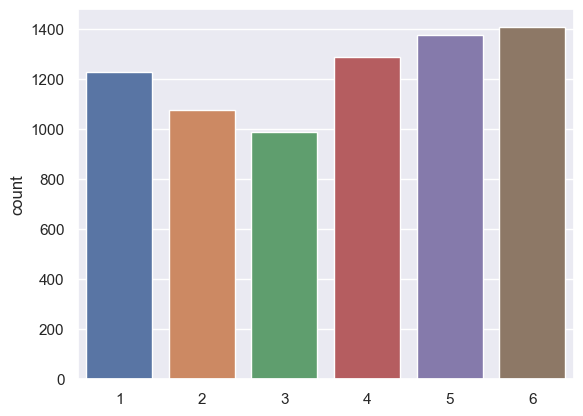

In [3]:
sns.countplot(y_train)

### 样本集拆分

In [4]:
data = np.concatenate((X_train,X_test))
target = np.concatenate((y_train,y_test))

In [5]:
def train_test_scores(k_list,data,target):
    train_mean_scores = []
    test_mean_scores = []
    # 不同的K值影响
    for k in k_list:
        train_scores = []
        test_scores = []
        model = KNeighborsClassifier(n_neighbors=k)
        # 多次划分数据集
        for i in range(2):
            X_train,X_test,y_train,y_test = train_test_split(data,target,test_size=0.2,random_state=i)
            model.fit(X_train,y_train)
            train_scores.append(model.score(X_train,y_train))
            test_scores.append(model.score(X_test,y_test))
        train_mean_scores.append(np.array(train_scores).mean())
        test_mean_scores.append(np.array(test_scores).mean())
    return np.array(train_mean_scores),np.array(test_mean_scores)

In [6]:
np.sqrt(data.shape[0]*0.8)

90.77003910982963

In [7]:
k_list = np.arange(1,90,step=9)
k_list

array([ 1, 10, 19, 28, 37, 46, 55, 64, 73, 82])

### 训练模型并打分

In [8]:
train_mean_scores,test_mean_scores = train_test_scores(k_list,data,target)

/Users/lianke/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/lianke/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer

/Users/lianke/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/lianke/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer

/Users/lianke/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/lianke/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer

### 根据分数图分析出最佳K值

<AxesSubplot:>

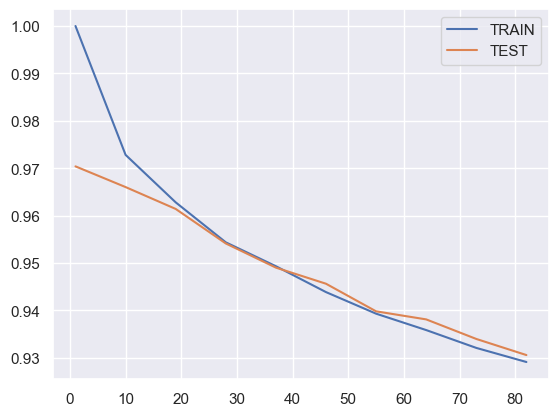

In [10]:
result = pd.DataFrame(data={
    "TRAIN":train_mean_scores,
    "TEST":test_mean_scores
},index=k_list)
result.plot()

## 手写数字识别

In [17]:
digits = load_digits()
images = digits.images
data = images.reshape((-1,64))
target = digits.target

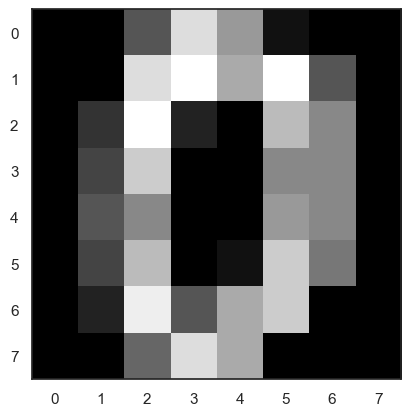

In [19]:
plt.imshow(data[0].reshape((8,8)),cmap='gray')

In [33]:
base_model = KNeighborsClassifier(weights="distance")

In [20]:
from sklearn.model_selection import cross_val_predict,cross_val_score

In [34]:
# cv K折线拆分的次数 
cross_val_predict(base_model,data,target,cv=3)

array([0, 1, 8, ..., 8, 9, 8])

In [35]:
# cv K折线拆分的次数
cross_val_score(base_model,data,target,cv=3)

array([0.96160267, 0.96661102, 0.96494157])

### 优化参数

In [57]:
k_list = np.arange(3,np.sqrt(data.shape[0]*0.8),step=4,dtype="int")

array([ 3,  7, 11, 15, 19, 23, 27, 31, 35])

In [60]:
mean_scores = []
for k in k_list:
    model = KNeighborsClassifier(n_neighbors=k,weights="distance")
    scores = cross_val_score(model,data,target,cv=3)
    mean_scores.append(scores.mean())

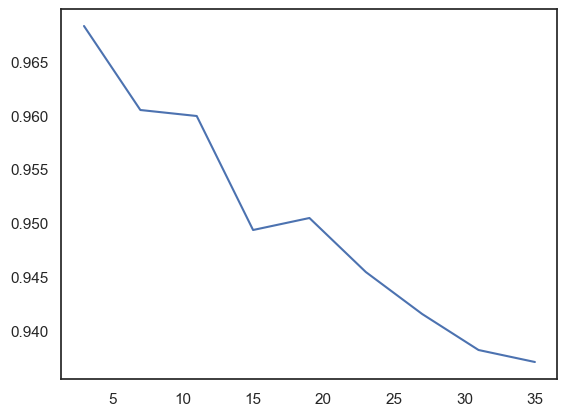

In [61]:
plt.plot(k_list,mean_scores)